In [56]:
#import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [57]:
data=pd.read_csv('G:/GK.csv')
data

,Special skill1,Clean sheets,Saves percentage,Saves,goals conceded,Defensive mistake,dribble won,Minutes played,Battle won1,Defensive performance,...,shoot,key pass,assist,goals,age,popularity,National game,club,Price1,Price2
0,2,0.4,14.0,2.6,0.6,0,0,7.4,0,0,...,0,0,0,0,28,6,0,est,650,525
1,1,0.0,172.0,2.3,0.3,0,0,2.0,0,0,...,0,0,0,0,22,1,0,est,50,75
2,3,1.1,80.4,3.3,0.5,0,0,0.6,0,0,...,0,0,0,0,32,5,0,est,500,700
3,1,0.0,100.0,2.0,0.0,0,0,0.6,0,0,...,0,0,0,0,22,2,0,alo,75,125
4,2,0.7,77.8,4.6,1.3,0,0,1.0,0,0,...,0,0,0,0,24,1,0,pad,300,300
5,1,0.0,66.7,2.0,1.0,0,0,0.6,0,0,...,0,0,0,0,20,2,0,pad,75,100
6,1,0.2,57.9,2.2,1.6,0,0,3.3,0,0,...,0,0,0,0,37,3,0,pad,200,1580
7,1,0.0,71.0,3.4,1.4,0,0,4.3,0,0,...,0,0,0,0,27,2,0,pad,175,200
8,1,0.0,66.7,2.0,1.0,0,0,1.3,0,0,...,0,0,0,0,31,4,2,pers,175,225
9,2,NaN,NaN,NaN,NaN,0,0,0.6,0,0,...,0,0,0,0,23,3,0,peyk,350,425


In [58]:
data.isna().sum()

Special skill1           0
Clean sheets             1
Saves percentage         1
Saves                    1
goals conceded           1
Defensive mistake        0
 dribble won             0
Minutes played           0
Battle won1              0
Defensive performance    0
Tackles won              0
correct pass             0
battles won2             0
Shot to goal  rate       0
shoot on target          0
shoot                    0
key pass                 0
assist                   0
goals                    0
age                      0
popularity               0
National game            0
club                     0
Price1                   0
Price2                   0
dtype: int64

In [59]:
data1=data.dropna(how="any")

data1.reset_index(drop=True,inplace=True)

In [60]:
data1

,Special skill1,Clean sheets,Saves percentage,Saves,goals conceded,Defensive mistake,dribble won,Minutes played,Battle won1,Defensive performance,...,shoot,key pass,assist,goals,age,popularity,National game,club,Price1,Price2
0,2,0.4,14.0,2.6,0.6,0,0,7.4,0,0,...,0,0,0,0,28,6,0,est,650,525
1,1,0.0,172.0,2.3,0.3,0,0,2.0,0,0,...,0,0,0,0,22,1,0,est,50,75
2,3,1.1,80.4,3.3,0.5,0,0,0.6,0,0,...,0,0,0,0,32,5,0,est,500,700
3,1,0.0,100.0,2.0,0.0,0,0,0.6,0,0,...,0,0,0,0,22,2,0,alo,75,125
4,2,0.7,77.8,4.6,1.3,0,0,1.0,0,0,...,0,0,0,0,24,1,0,pad,300,300
5,1,0.0,66.7,2.0,1.0,0,0,0.6,0,0,...,0,0,0,0,20,2,0,pad,75,100
6,1,0.2,57.9,2.2,1.6,0,0,3.3,0,0,...,0,0,0,0,37,3,0,pad,200,1580
7,1,0.0,71.0,3.4,1.4,0,0,4.3,0,0,...,0,0,0,0,27,2,0,pad,175,200
8,1,0.0,66.7,2.0,1.0,0,0,1.3,0,0,...,0,0,0,0,31,4,2,pers,175,225
9,1,0.1,69.2,1.9,0.9,0,0,9.3,0,0,...,0,0,0,0,24,2,0,peyk,175,225


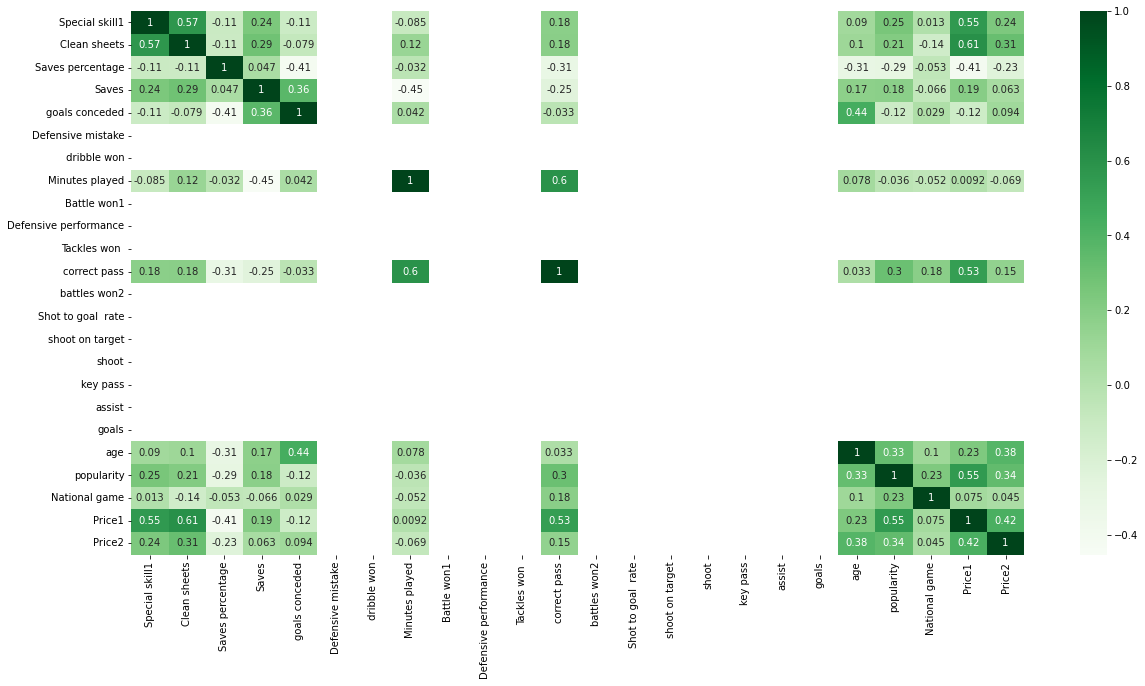

In [61]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


df = pd.DataFrame(data1)

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X= pd.DataFrame(data1, columns = ['goals conceded','Saves percentage','Special skill1','Clean sheets','Saves','Minutes played','correct pass','age','popularity','National game' 
                                 ])
y=data1['Price2'].values.reshape(-1,1)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1
                                                ,random_state=0)
model = LinearRegression ()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute eror: 234.31244536827367
Mean Squared Error: 84811.11581200808
Root Mean Squared Error: 291.22348087338025
R2 Score: -0.3188769629513135


In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [88]:
model_new=LinearRegression ()
kfold_validation=KFold(15)
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[ 9.26108993e-01  8.34611706e-01 -6.16712076e+00 -1.00708459e+00
  0.00000000e+00 -4.46935505e+00 -1.10947708e+03  5.19179592e-01
 -4.28883330e+01 -1.38276276e+01 -2.41219172e+00  0.00000000e+00
 -1.00720174e+03 -4.84085047e+00  0.00000000e+00]
-146.00076594612275


In [102]:
dfa=data1[data1.index<16]
dfa1=data1[data1.index>20]
dfa2=dfa.append(dfa1)
dfa2.reset_index(drop=True,inplace=True)
X= pd.DataFrame(dfa2, columns = ['goals conceded','Saves percentage','Special skill1','Clean sheets','Saves','Minutes played','correct pass','age','popularity','National game' 
                                 ])
y=dfa2['Price1'].values.reshape(-1,1)
X_train1,X_test1,y_train1,y_test1 =train_test_split(X,y,test_size=0.1
                                                    ,random_state=0)
modelnew = LinearRegression ()
modelnew.fit(X_train1,y_train1)
y_pred1=modelnew.predict(X_test1)
print('Mean Absolute eror:',metrics.mean_absolute_error(y_test1,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test1,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test1,y_pred1))
#4-8
#8-12
#12-16
#16-20

Mean Absolute eror: 28.43764046010179
Mean Squared Error: 1237.9769137154829
Root Mean Squared Error: 35.18489610209873
R2 Score: 0.9592993891381211


In [105]:
X

,goals conceded,Saves percentage,Special skill1,Clean sheets,Saves,Minutes played,correct pass,age,popularity,National game
0,0.6,14.0,2,0.4,2.6,7.4,75.5,28,6,0
1,0.3,172.0,1,0.0,2.3,2.0,0.0,22,1,0
2,0.5,80.4,3,1.1,3.3,0.6,0.0,32,5,0
3,0.0,100.0,1,0.0,2.0,0.6,0.0,22,2,0
4,1.3,77.8,2,0.7,4.6,1.0,0.0,24,1,0
5,1.0,66.7,1,0.0,2.0,0.6,0.0,20,2,0
6,1.6,57.9,1,0.2,2.2,3.3,0.0,37,3,0
7,1.4,71.0,1,0.0,3.4,4.3,0.0,27,2,0
8,1.0,66.7,1,0.0,2.0,1.3,0.0,31,4,2
9,0.9,69.2,1,0.1,1.9,9.3,0.0,24,2,0


In [110]:

goalsconceded=float(input("goals conceded for GKplayeris a"))

Savespercentage=float(input("Saves percentage for GKplayer is "))

battleswon1=float(input("battles won1 for GKplayer is "))
Specialskill1=float(input(" correctpass for GKplayer is "))

Cleansheets=float(input("Clean sheets for GKplayer is "))
Saves=float(input("Saves for GKplayer is "))

Minutesplayeds=float(input("Minutes played for GKplayer is "))
correctpass=float(input("correct pass for GKplayer is")) 
age=float(input("age for GKplayer is"))
popularity=float(input("popularity  for GKplayer is"))
age=float(input("age  for GKplayer is"))
popularity =float(input("popularity   for GKplayer is")) 
Nationalgame=float(input("National game  for GKplayer is"))

p2=modelnew.predict([[goalsconceded,Savespercentage,Specialskill1,Cleansheets,Saves,Minutesplayeds,correctpass,age,popularity,Nationalgame]])
p2

goals conceded for GKplayeris a2
Saves percentage for GKplayer is 0
battles won1 for GKplayer is 7
 correctpass for GKplayer is 5
Clean sheets for GKplayer is 2
Saves for GKplayer is 2
Minutes played for GKplayer is 53
correct pass for GKplayer is0
age for GKplayer is2
popularity  for GKplayer is2
age  for GKplayer is5
popularity   for GKplayer is65
National game  for GKplayer is8


array([[1210.29738545]])